<a href="https://colab.research.google.com/github/yashvyas1405/Indian-Team-Data-Analysis-of-2018-and-2019-macthes/blob/main/Indian%20Cricket%20Team%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [25]:
pip install pandasql

In [26]:
import pandasql as ps

In [27]:
df = pd.read_csv('commentary.csv')
df.head()

,over_number,comm,score,match,year,batsman_bowler,bowler,batsman,innings_no,runs,batting_team,bowling_team,result,event
0,19.6,"Chris Morris to Axar, 1 run, widish yorker out...",172.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Axar,Chris Morris,Axar,1,1.0,ind,rsa,1,runs
1,19.5,"Chris Morris to Bhuvneshwar, 3 runs, full toss...",171.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Bhuvneshwar,Chris Morris,Bhuvneshwar,1,3.0,ind,rsa,1,runs
2,19.4,"Chris Morris to Karthik, <b>out</b> Lbw!! Kart...",168.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Karthik,Chris Morris,Karthik,1,0.0,ind,rsa,1,out
3,19.4,"Chris Morris to Karthik, <b>wide</b>, another ...",168.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Karthik,Chris Morris,Karthik,1,1.0,ind,rsa,1,runs
4,19.3,"Chris Morris to Karthik, <b>FOUR</b>, low full...",167.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Karthik,Chris Morris,Karthik,1,4.0,ind,rsa,1,runs


# Exploratory Data Analysis

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6781 entries, 0 to 6780
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   over_number     6781 non-null   float64
 1   comm            6781 non-null   object 
 2   score           6781 non-null   float64
 3   match           6781 non-null   object 
 4   year            6781 non-null   int64  
 5   batsman_bowler  6781 non-null   object 
 6   bowler          6781 non-null   object 
 7   batsman         6781 non-null   object 
 8   innings_no      6781 non-null   int64  
 9   runs            6781 non-null   float64
 10  batting_team    6781 non-null   object 
 11  bowling_team    6781 non-null   object 
 12  result          6781 non-null   int64  
 13  event           6781 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 741.8+ KB


In [29]:
df.describe()

,over_number,score,year,innings_no,runs,result
count,6781.000000,6781.000000,6781.000000,6781.000000,6781.000000,6781.000000
mean,9.630748,79.846778,2018.431057,1.482672,1.366760,1.676154
std,5.668288,51.248685,0.495261,0.499737,1.715317,0.467977
min,0.100000,0.000000,2018.000000,1.000000,0.000000,1.000000
25%,4.600000,37.000000,2018.000000,1.000000,0.000000,1.000000
50%,9.500000,76.000000,2018.000000,1.000000,1.000000,2.000000
75%,14.400000,118.000000,2019.000000,2.000000,1.000000,2.000000
max,19.600000,240.000000,2019.000000,2.000000,28.000000,2.000000


In [30]:
df.isnull().sum()

over_number       0
comm              0
score             0
match             0
year              0
batsman_bowler    0
bowler            0
batsman           0
innings_no        0
runs              0
batting_team      0
bowling_team      0
result            0
event             0
dtype: int64

In [31]:
batting_df = df[df['batting_team']== 'ind']
num = len(batting_df['match'].unique())
print("Total no. of matches India played:",num)

Total no. of matches India played: 28


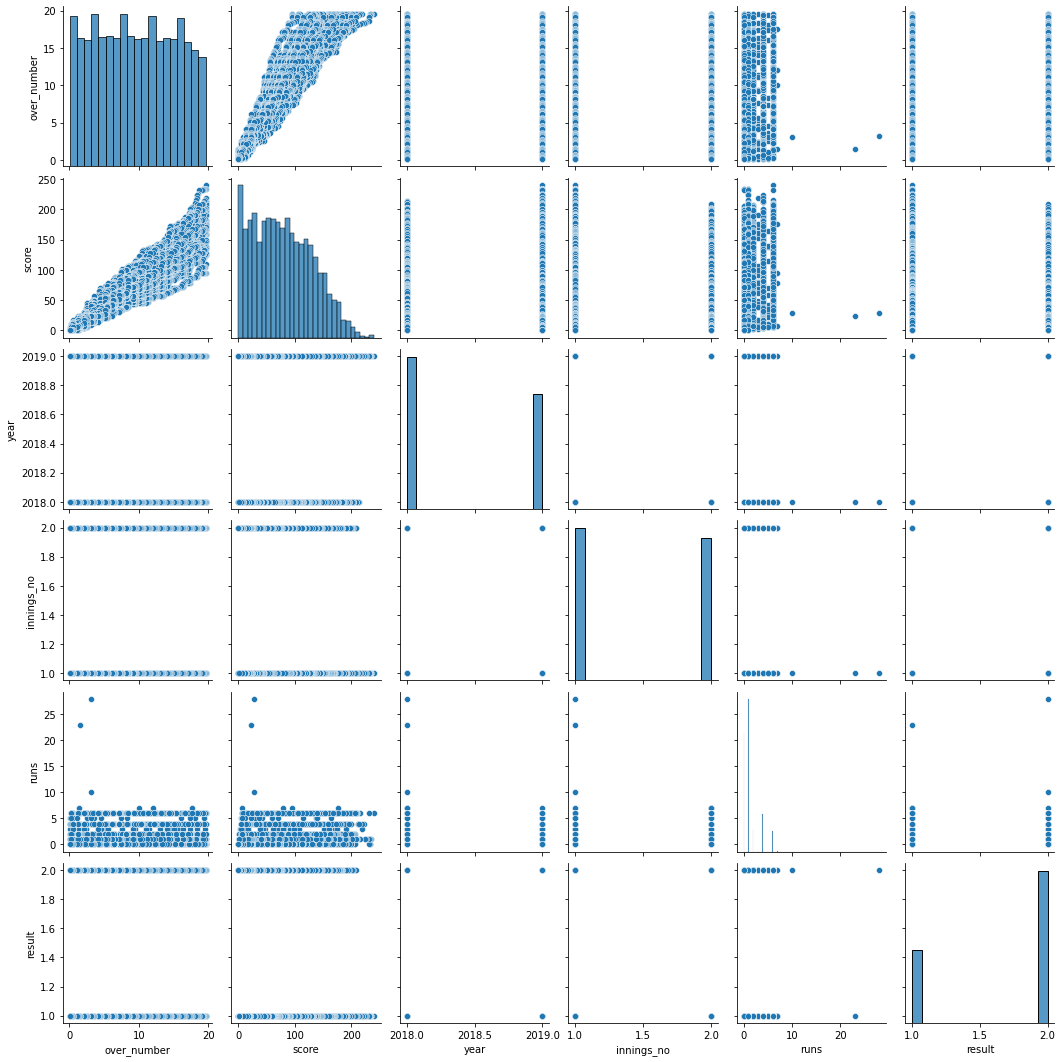

In [32]:
sns.pairplot(df)

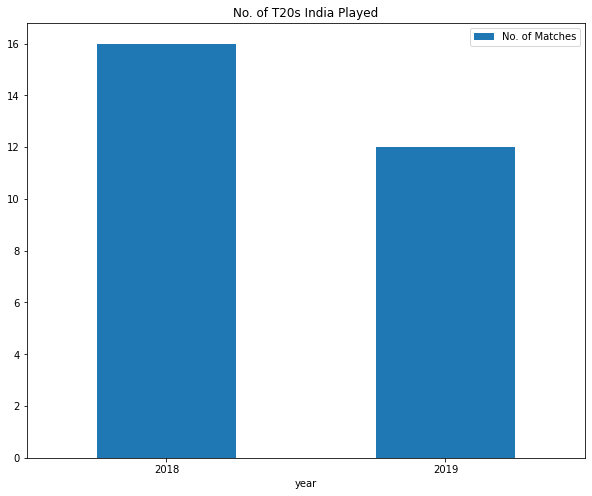

In [33]:
num_of_matches=batting_df.groupby(['year']).apply(lambda x:x['match'].nunique()).reset_index(name='No. of Matches')
fig = num_of_matches.plot.bar(x="year", y="No. of Matches", rot=0, title="No. of T20s India Played",figsize=(10,8)).get_figure()

In [34]:
score = batting_df.groupby(['year','match','innings_no']).apply(lambda x:x['runs'].sum()).reset_index(name='score')
print("India's average when they bat first:",np.median(score[score['innings_no']==1]['score'].values))
print("India's average when they bowl first:",np.median(score[score['innings_no']==2]['score'].values))

India's average when they bat first: 183.0
India's average when they bowl first: 157.5


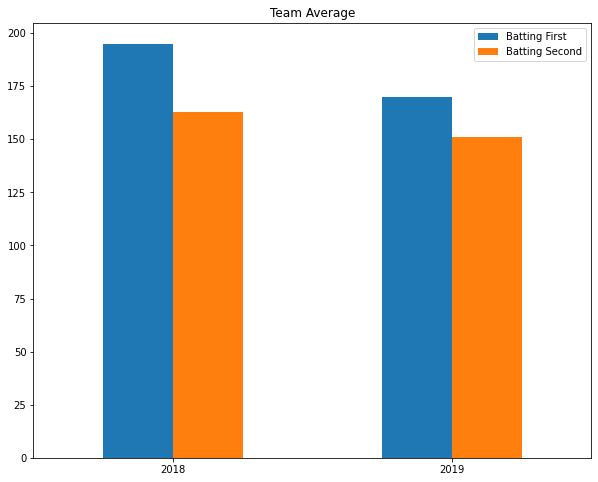

In [35]:
  first_innings_df=score[score['innings_no']==1]
  second_innings_df=score[score['innings_no']==2]

  df1 = first_innings_df.groupby('year').apply(lambda x:np.median(x['score'].values)).reset_index(name = 'score')
  df2 = second_innings_df.groupby('year').apply(lambda x: np.median(x['score'].values)).reset_index(name = 'score')

  data = {"Batting First": df1['score'].values,
          "Batting Second":df2['score'].values
         }
  index = df1['year'].values

  new_dataframe = pd.DataFrame(data=data, index = index)

  fig = new_dataframe.plot.bar(rot = 0, title = 'Team Average', figsize = (10, 8)).get_figure()

In [36]:
#after we do group by the column sets as index and to reset back it into columns we use rest_index().
grp = batting_df.groupby('match').first().reset_index() #Pandas dataframe.groupby() function is used to split the data 
                                                        #into groups based on some criteria.


In [37]:
grp

,match,over_number,comm,score,year,batsman_bowler,bowler,batsman,innings_no,runs,batting_team,bowling_team,result,event
0,ban-vs-ind-2nd-match-india-and-bangladesh-in-s...,18.4,"Rubel to Manish Pandey, 1 run, diving half-sto...",140.0,2018,Rubel to Manish Pandey,Rubel,Manish Pandey,2,1.0,ind,ban,2,runs
1,ban-vs-ind-5th-match-india-and-bangladesh-in-s...,19.6,"Rubel to Rohit, <b>out</b> Rohit Run Out!! Exc...",176.0,2018,Rubel to Rohit,Rubel,Rohit,1,0.0,ind,ban,1,out
2,eng-vs-ind-1st-t20i-india-tour-of-england-2018,18.2,"Moeen Ali to Kohli, <b>SIX</b>, seals in style...",163.0,2018,Moeen Ali to Kohli,Moeen Ali,Kohli,2,6.0,ind,eng,2,runs
3,eng-vs-ind-2nd-t20i-india-tour-of-england-2018,19.6,"J Ball to Dhoni, <b>FOUR</b>, and he finishes ...",148.0,2018,J Ball to Dhoni,J Ball,Dhoni,1,4.0,ind,eng,2,runs
4,eng-vs-ind-3rd-t20i-india-tour-of-england-2018,18.4,"Jordan to Hardik Pandya, <b>SIX</b>, <b>Hardik...",201.0,2018,Jordan to Hardik Pandya,Jordan,Hardik Pandya,2,6.0,ind,eng,2,runs
5,ind-vs-aus-1st-t20i-australia-tour-of-india-2019,19.6,"Coulter-Nile to Dhoni, leg byes, 1 run, back o...",126.0,2019,Coulter-Nile to Dhoni,Coulter-Nile,Dhoni,1,1.0,ind,aus,2,runs
6,ind-vs-aus-2nd-t20i-australia-tour-of-india-2019,19.6,"Pat Cummins to Kohli, <b>SIX</b>, <b>whatta wa...",190.0,2019,Pat Cummins to Kohli,Pat Cummins,Kohli,1,6.0,ind,aus,2,runs
7,ind-vs-ban-final-india-and-bangladesh-in-sri-l...,19.6,"Soumya Sarkar to Karthik, <b>SIX</b>, <b>DK! H...",168.0,2018,Soumya Sarkar to Karthik,Soumya Sarkar,Karthik,2,6.0,ind,ban,2,runs
8,ind-vs-rsa-2nd-t20i-south-africa-tour-of-india...,18.6,"Fortuin to Shreyas Iyer, <b>FOUR</b>, full and...",151.0,2019,Fortuin to Shreyas Iyer,Fortuin,Shreyas Iyer,2,4.0,ind,rsa,2,runs
9,ind-vs-rsa-3rd-t20i-south-africa-tour-of-india...,19.6,"Rabada to Navdeep Saini, byes, 1 run, back of ...",134.0,2019,Rabada to Navdeep Saini,Rabada,Navdeep Saini,1,1.0,ind,rsa,2,runs


#Batting Analysis

## Overall winning % of Indian Team

In [38]:
#for a particular team to win in the the match based on innings(innings == result)
matches_won = grp[grp['innings_no'] == grp['result']]
print('Overall winning % :', round(((matches_won.shape[0]/num)*100), 2)) # num = no. of macthes India played.

Overall winning % : 67.86


## Winning % of Indian Team when batting first vs when batting second

In [39]:
first = grp[grp['innings_no'] == 1]
second = grp[grp['innings_no'] == 2]

won1 = first[first['innings_no'] == first['result']]
print('Batting First Winning % :', (won1.shape[0]/first.shape[0])*100)

won2 = second[second['innings_no'] == second['result']]
print('Batting Second Winning %:', (won2.shape[0]/second.shape[0])*100)

Batting First Winning % : 50.0
Batting Second Winning %: 85.71428571428571


## Batting Against Different Teams

In [40]:
df1 = grp.groupby('bowling_team').apply(lambda x: x.shape[0]).reset_index(name='no')
df1.head()
df2 = grp.groupby('bowling_team').apply(lambda x: x[x['innings_no'] == x['result']].shape[0]).reset_index(name='won')
df2

,bowling_team,won
0,aus,0
1,ban,3
2,eng,2
3,ire,2
4,nz,1
5,rsa,3
6,sl,1
7,wi,7


In [41]:
df1

,bowling_team,no
0,aus,2
1,ban,3
2,eng,3
3,ire,2
4,nz,3
5,rsa,5
6,sl,2
7,wi,8


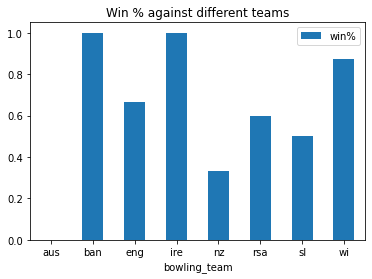

In [42]:
df2['win%'] = df2['won']/df1['no']
fig = df2.plot.bar(x = 'bowling_team', y = 'win%', rot = 0, title = 'Win % against different teams').get_figure()

## How much to score to win the match?

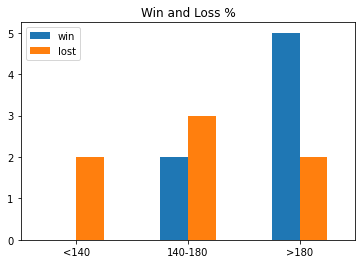

In [43]:
block1 = first[first['score'] < 140]
won1 = block1[block1['innings_no'] == block1['result']].shape[0] # count
lost1 = block1[block1['innings_no'] != block1['result']].shape[0]

block2 = first[(first['score']>=140) & (first['score']<=180) ] 
won2=block2.groupby('year').apply(lambda x: x.shape[0] / x[x['event']=='out'].shape[0] ).reset_index(name='strike rate')
lost2=block2[block2['innings_no']!=block2['result']].shape[0] 

block3 = first[first['score']>180] 
won3 = block3[block3['innings_no']==block3['result']].shape[0] 
lost3=block3[block3['innings_no']!=block3['result']].shape[0]

data = {'win': [won1, won2, won3],
        'lost': [lost1, lost2, lost3]};

index = ['<140', '140-180', '>180']

dataFrame = pd.DataFrame(data=data, index=index);
dataFrame.head()
axes = dataFrame.plot.bar(rot = 0, title = 'Win and Loss %').get_figure()


## Strike Rate across the years

In [44]:
batting_df=df[df['batting_team']=='ind']
bowling_df=df[df['bowling_team']=='ind']

#strike rate of indian team
sr=(np.sum(batting_df['runs'].values)/batting_df.shape[0])*100
print("Strike rate of Indian team:",sr)

Strike rate of Indian team: 141.7989417989418


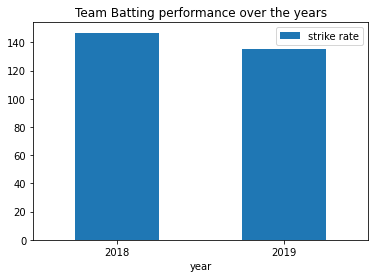

In [45]:
sr = batting_df.groupby('year').apply(lambda x: np.sum(x['runs'].values)/x.shape[0]*100).reset_index(name = 'strike rate')
fig = sr.plot.bar(x = 'year', y = 'strike rate', rot = 0, title = "Team Batting performance over the years").get_figure()

**India had excellent strike rate in 2018.**

## Team batting strike rate across different phases of a match:

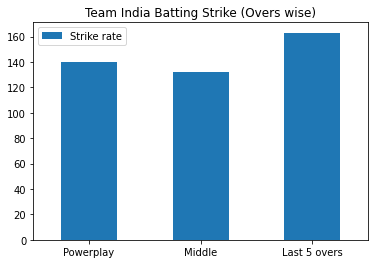

In [46]:
powerplay_df =  df[df['over_number'] <= 5.6]
middle_df = df[(df['over_number']>=6.1) & (df['over_number']<=14.6)]
last_df = df[(df['over_number'] > 15.1) & (df['over_number'] <= 19.6)]

powerplay_batting_df = powerplay_df[powerplay_df['batting_team']=='ind']
middle_batting_df = middle_df[middle_df['batting_team']=='ind']
last_batting_df = last_df[last_df['batting_team']=='ind']

sr1=(np.sum(powerplay_batting_df['runs'].values)/powerplay_batting_df.shape[0])*100
sr2=(np.sum(middle_batting_df['runs'].values)/middle_batting_df.shape[0])*100
sr3=(np.sum(last_batting_df['runs'].values)/last_batting_df.shape[0])*100

#plot
data = {"Strike rate":[sr1,sr2,sr3]};

index  = ["Powerplay", "Middle", "Last 5 overs"];

# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart
axes = dataFrame.plot.bar(rot=0, title="Team India Batting Strike (Overs wise)").get_figure()

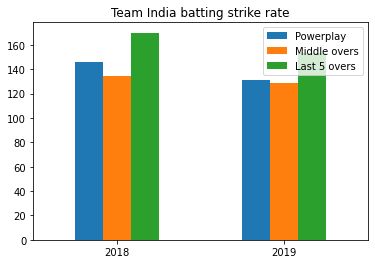

In [47]:
#Strike rate 
score = powerplay_batting_df.groupby(['year','match']).apply(lambda x:x['runs'].sum()).reset_index(name='score') 
pp=powerplay_batting_df.groupby("year").apply(lambda x:(x['runs'].sum()/x.shape[0])*100).reset_index(name='strike rate')
middle=middle_batting_df.groupby("year").apply(lambda x:(x['runs'].sum()/x.shape[0])*100).reset_index(name='strike rate') 
last=last_batting_df.groupby("year").apply(lambda x:(x['runs'].sum()/x.shape[0])*100).reset_index(name='strike rate')

data = {"Powerplay":pp['strike rate'].values,
        "Middle overs":middle['strike rate'].values,
        "Last 5 overs":last['strike rate'].values
        };

index  = last['year'].values
# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart
axes = dataFrame.plot.bar(rot=0, title="Team India batting strike rate")
#axes[1].legend(loc=2)  

fig=axes.get_figure()


# Bowling Analysis

In this section, let’s unleash the bowling performance of team India in terms of Economy rate, Bowling Strike rate, and Bowling Average. And also how the performance has evolved over time.

**Economy rate** is defined as the average number of runs conceded per over

**Bowling strike** rate can be defined as the average number of balls conceded for a wicket

**Bowling Average** is the average number of runs conceded for a wicket

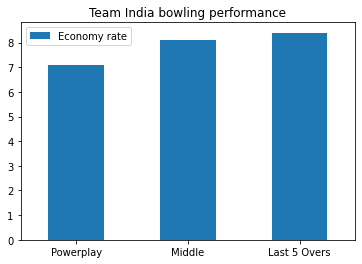

In [48]:
powerplay_bowling_df = powerplay_df[powerplay_df['bowling_team']=='ind']
middle_bowling_df = middle_df[middle_df['bowling_team']=='ind']
last_bowling_df = last_df[last_df['bowling_team']=='ind']

temp = powerplay_bowling_df.groupby('match').apply(lambda x:x['runs'].sum()).reset_index() # For every macth do sum of runs
avg1 = np.median(temp[0].values)
Eco_rate1 = avg1/6.0

temp = middle_bowling_df.groupby('match').apply(lambda x:x['runs'].sum()).reset_index()
avg2 = np.median(temp[0].values)
Eco_rate2 = avg2/9.0

temp = last_bowling_df.groupby('match').apply(lambda x:x['runs'].sum()).reset_index()
avg3 = np.median(temp[0].values)
Eco_rate3 = avg3/5.0

data = {'Economy rate' : [Eco_rate1, Eco_rate2, Eco_rate3]}
index = ['Powerplay', 'Middle', 'Last 5 Overs']

dataFrame = pd.DataFrame(data = data, index = index)
fig = dataFrame.plot.bar(rot = 0, title = 'Team India bowling performance').get_figure()

## Team India bowling performance across different phases of a match:

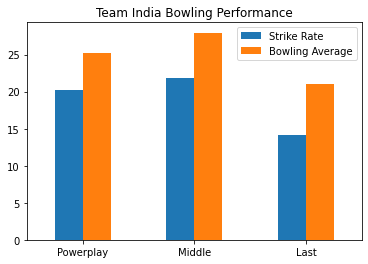

In [49]:
sr1 = powerplay_bowling_df.shape[0]/powerplay_bowling_df[powerplay_bowling_df['event'] == 'out'].shape[0]
sr2 = middle_bowling_df.shape[0]/middle_bowling_df[middle_bowling_df['event'] == 'out'].shape[0]
sr3 = last_bowling_df.shape[0]/last_bowling_df[last_bowling_df['event'] == 'out'].shape[0]

avg1=np.sum(powerplay_bowling_df['runs'].values)/(powerplay_bowling_df[powerplay_bowling_df['event']=='out'].shape[0])
avg2=np.sum(middle_bowling_df['runs'].values)/(middle_bowling_df[middle_bowling_df['event']=='out'].shape[0])
avg3=np.sum(last_bowling_df['runs'].values)/(last_bowling_df[last_bowling_df['event']=='out'].shape[0])

data = {'Strike Rate': [sr1, sr2, sr3],
        'Bowling Average': [avg1, avg2, avg3]}
index = ['Powerplay', 'Middle', 'Last']
dataFrame = pd.DataFrame(data = data, index = index)
fig = dataFrame.plot.bar(rot = 0, title = 'Team India Bowling Performance').get_figure()

## Team India bowling performance across different phases of a match over the years:

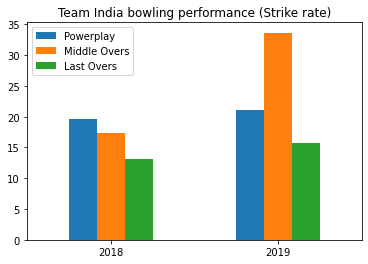

In [50]:
pp=powerplay_bowling_df.groupby('year').apply(lambda x: x.shape[0] / x[x['event']=='out'].shape[0] ).reset_index(name='strike rate')
middle = middle_bowling_df.groupby('year').apply(lambda x: x.shape[0] / x[x['event'] == 'out'].shape[0]).reset_index(name = 'strike rate')
last = last_bowling_df.groupby('year').apply(lambda x: x.shape[0] / x[x['event'] == 'out'].shape[0]).reset_index(name = 'strike rate')

data = {'Powerplay':pp['strike rate'].values,
        'Middle Overs':middle['strike rate'].values,
        'Last Overs':last['strike rate'].values}
index = last['year'].values

dataFrame = pd.DataFrame(data=data, index=index);
fig = dataFrame.plot.bar(rot=0, title="Team India bowling performance (Strike rate)").get_figure()

India was not good at bowling in middle oves as they took 34 balls to take a wicket.

# Boundary Analysis

In [55]:
print('Average no of balls to hit 4:', round(batting_df.shape[0]/ batting_df['runs'].value_counts()[4]))
print('Average no of balls to hit 6:', round(batting_df.shape[0]/ batting_df['runs'].value_counts()[6]))

Average no of balls to hit 4: 9
Average no of balls to hit 6: 17


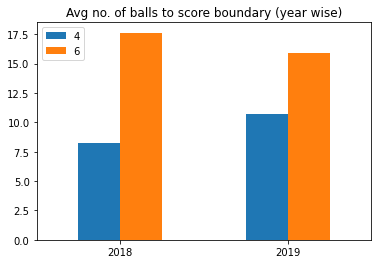

In [57]:
df_4 = batting_df.groupby('year').apply(lambda x:x.shape[0] / x[x['runs'] == 4].shape[0]).reset_index(name = 'num_of_balls')
df_6 = batting_df.groupby('year').apply(lambda x:x.shape[0] / x[x['runs'] == 6].shape[0]).reset_index(name = 'num_of_balls')

data = {'4':df_4['num_of_balls'].values,
        '6':df_6['num_of_balls'].values}
index = df_4['year'].values

dataFrame = pd.DataFrame(data=data, index=index)

fig = dataFrame.plot.bar(rot = 0, title = "Avg no. of balls to score boundary (year wise)").get_figure()

Team India power hitting improved a little bit from 2018.

## Average number of balls to score a boundary across different phases of match.

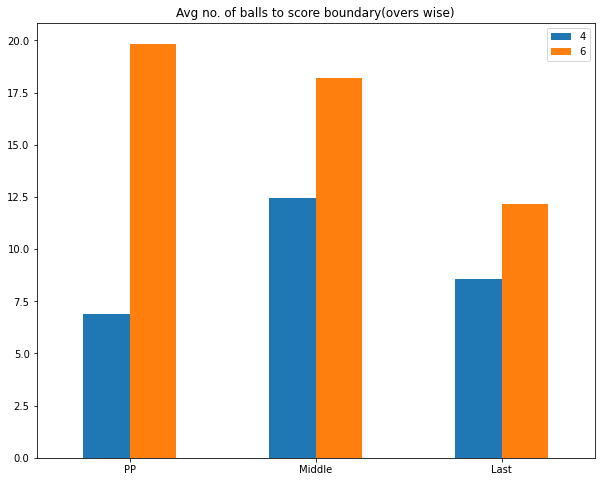

In [61]:
num1 = powerplay_batting_df.shape[0]/powerplay_batting_df['runs'].value_counts()[4]
num2 = middle_batting_df.shape[0]/middle_batting_df['runs'].value_counts()[4]
num3 = last_batting_df.shape[0]/last_batting_df['runs'].value_counts()[4]

x_axis = ['PP','Middle','Last']
y_axis = [num1, num2, num3]
dataframe= pd.DataFrame({'overs':x_axis,'4':y_axis})

num1=powerplay_batting_df.shape[0]/powerplay_batting_df['runs'].value_counts()[6]
num2=middle_batting_df.shape[0]/middle_batting_df['runs'].value_counts()[6]
num3=last_batting_df.shape[0]/last_batting_df['runs'].value_counts()[6]
dataframe['6'] = [num1,num2,num3]

data = {"4":dataframe['4'].values,
"6":dataframe['6'].values
};

index = dataframe['overs'].values
# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart
fig = dataFrame.plot.bar(rot=0, title="Avg no. of balls to score boundary(overs wise)",figsize=(10,8)).get_figure()

India clears 4 for every over in the power play and the last 5 overs.

Team India smashes only 1 six in power play as the batsmen concede 24+ balls for a six.

## Average number of balls to score 4 across different phases over the years.

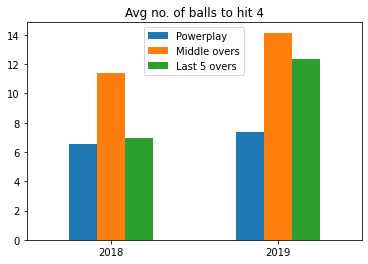

In [63]:
pp = powerplay_batting_df.groupby('year').apply(lambda x: x.shape[0] / x[x['runs'] == 4].shape[0]).reset_index(name = 'no_of_balls')
middle = middle_batting_df.groupby('year').apply(lambda x: x.shape[0] / x[x['runs'] == 4].shape[0]).reset_index(name = 'no_of_balls')
last = last_batting_df.groupby('year').apply(lambda x: x.shape[0] / x[x['runs'] == 4].shape[0]).reset_index(name = 'no_of_balls')

data = {"Powerplay":pp['no_of_balls'].values,
        "Middle overs":middle['no_of_balls'].values,
        "Last 5 overs":last['no_of_balls'].values
        };
index  = last['year'].values

dataFrame = pd.DataFrame(data=data, index=index);

axes = dataFrame.plot.bar(rot=0, title="Avg no. of balls to hit 4")

fig=axes.get_figure()

## Average number of balls to score 6 across different phases over the years.

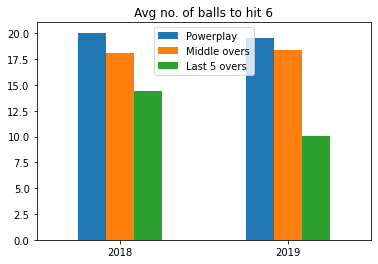

In [65]:
pp=powerplay_batting_df.groupby('year').apply(lambda x: x.shape[0] / x[x['runs']==6].shape[0] ).reset_index(name='no_of_balls')
middle=middle_batting_df.groupby('year').apply(lambda x: x.shape[0] / x[x['runs']==6].shape[0] ).reset_index(name='no_of_balls')
last=last_batting_df.groupby('year').apply(lambda x: x.shape[0] / x[x['runs']==6].shape[0] ).reset_index(name='no_of_balls')

# A python dictionary
data = {"Powerplay":pp['no_of_balls'].values,
        "Middle overs":middle['no_of_balls'].values,
        "Last 5 overs":last['no_of_balls'].values
        };

index  = last['year'].values
# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart
axes = dataFrame.plot.bar(rot=0, title="Avg no. of balls to hit 6")

fig=axes.get_figure()